The idea here is to understand how CNN filters are working with and in each layer and observe the feature map. Again CODE is not that important. We just need to get an idea of how CNN sees the image.

In [79]:
# Importing the Dependencies

import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16 , preprocess_input
from keras import Model
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img , img_to_array , array_to_img

In [63]:
# Load the Model

model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [64]:
## We will write code for 2 things,

## 1. To show the no. of Filters in each conv layer
## 2. To print the Feature Map of different conv layers

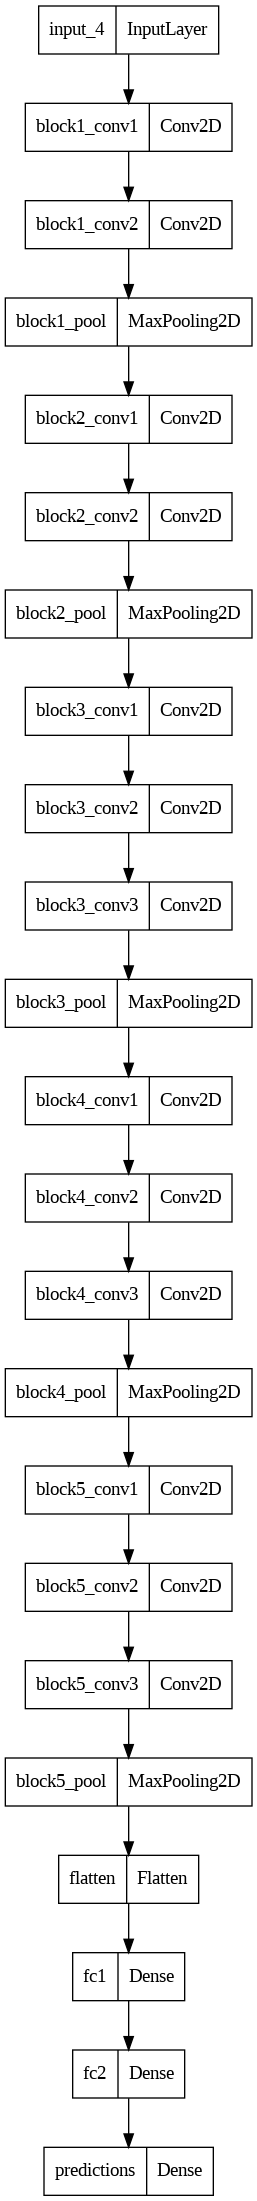

In [65]:
from keras.utils import plot_model

plot_model(model)

In [66]:
# Plotting the filters

for i in range(len(model.layers)):
  # check for convolutional layer
  if 'conv' not in model.layers[i].name:
    continue

  # get filter weights
  filters,biases = model.layers[i].get_weights()
  print('Layer No', i, model.layers[i].name, filters.shape)


Layer No 1 block1_conv1 (3, 3, 3, 64)
Layer No 2 block1_conv2 (3, 3, 64, 64)
Layer No 4 block2_conv1 (3, 3, 64, 128)
Layer No 5 block2_conv2 (3, 3, 128, 128)
Layer No 7 block3_conv1 (3, 3, 128, 256)
Layer No 8 block3_conv2 (3, 3, 256, 256)
Layer No 9 block3_conv3 (3, 3, 256, 256)
Layer No 11 block4_conv1 (3, 3, 256, 512)
Layer No 12 block4_conv2 (3, 3, 512, 512)
Layer No 13 block4_conv3 (3, 3, 512, 512)
Layer No 15 block5_conv1 (3, 3, 512, 512)
Layer No 16 block5_conv2 (3, 3, 512, 512)
Layer No 17 block5_conv3 (3, 3, 512, 512)


In [67]:
# retrieveing the weights from second hidden layer

filters, biases = model.layers[1].get_weights()

In [68]:
# Normalizing filter values between 0-1 so we can visualize them

f_mx, f_mn = filters.max(), filters.min()
filters = (filters-f_mn)/(f_mx-f_mn)

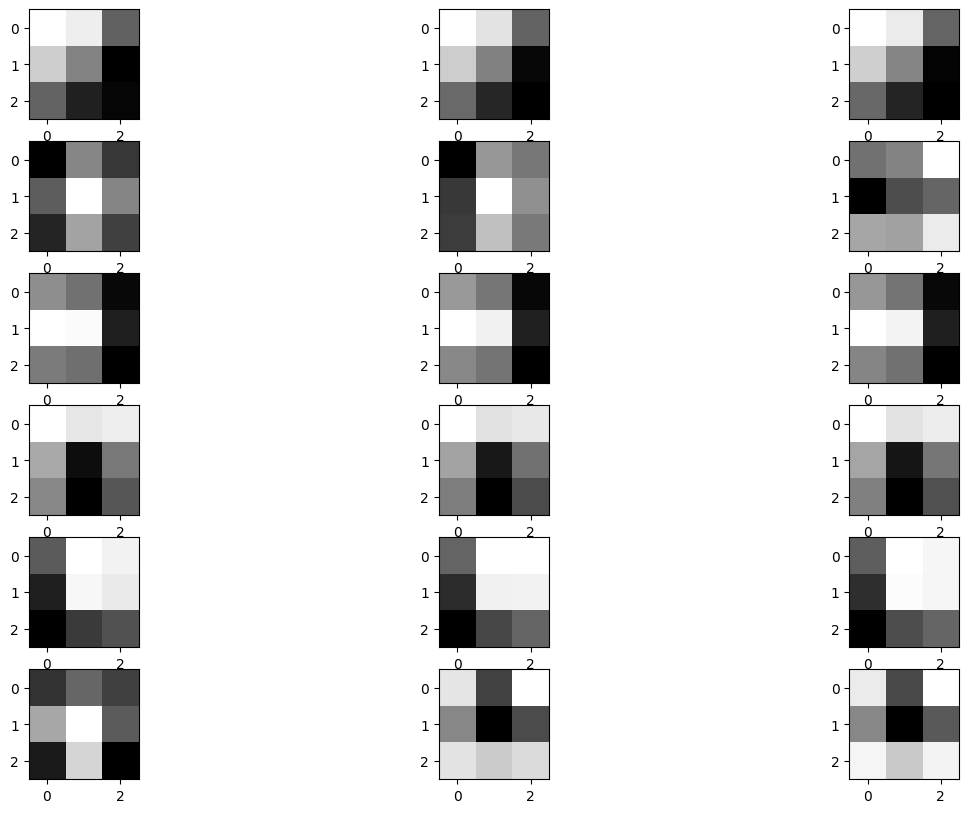

In [69]:
# There are 64 filters used in conv layer 1 , we will try to print 18

n_filters = 6
ix=1
fig = plt.figure(figsize = (15,10))
for i in range(n_filters):
  # get the filetrs
  f = filters[:,:,:,i]
  for j in range(3):
    # subplot for 6 filters and 3 channels
    plt.subplot(n_filters,3,ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix+=1

#plot the filters
plt.show()

As we can see each filter is trying to detect the a particular feature. Focus on Black color of each image

In [70]:
# To see when we convolve these filter over the image what it try to find in the image

# Creating a subset of VGG16 confined to layer1 only

model = Model(inputs = model.inputs , outputs = model.layers[1].output)

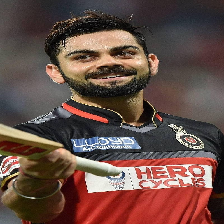

In [82]:

# Extracting the img

img = load_img('/content/VIRAT.jpeg', target_size=(224,224))

img


In [83]:
# Coverting into array

img_arry = img_to_array(img)

# Expanding the Dimension so it represents a single 'sample'

img_arry = np.expand_dims(img_arry, axis = 0)

# Performing pre-processing on sample

image = preprocess_input(img_arry)

1/1 [==============================] - 0s 31ms/step


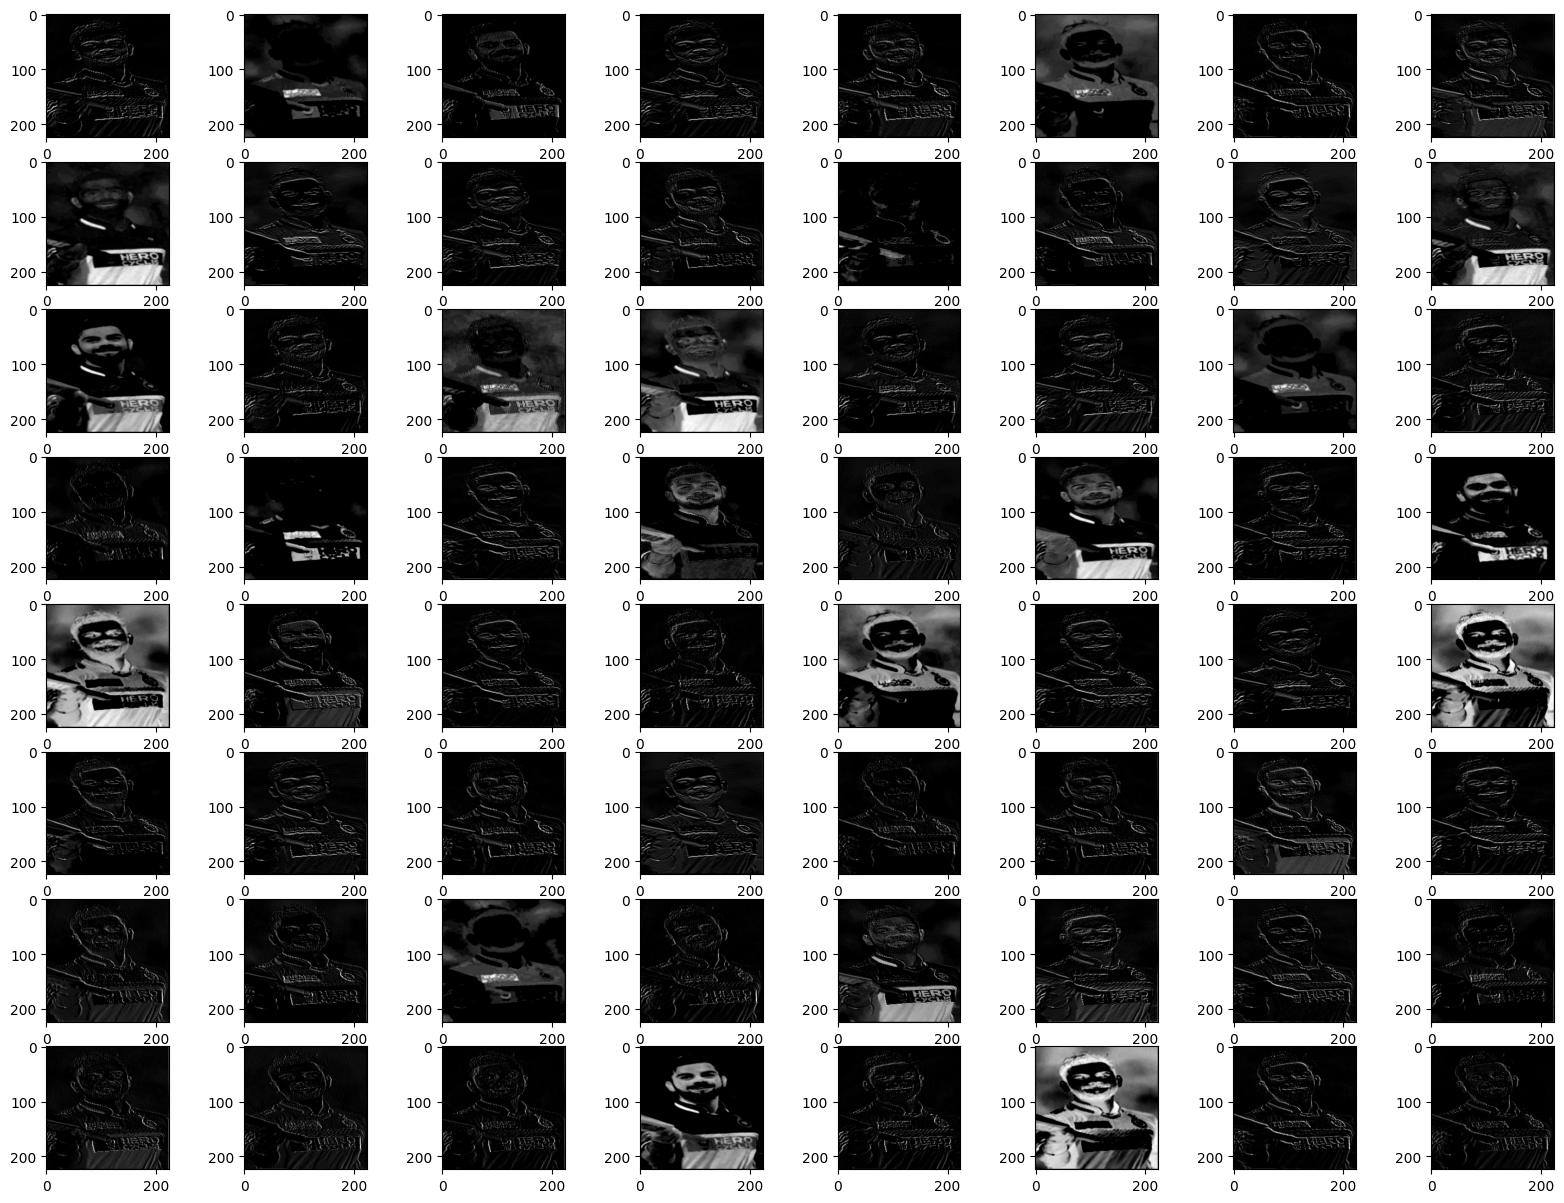

In [89]:
# Calculating the features map

features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1, features.shape[3]+1): # features.shape[3] = 64 # of Filters used in ConvLayer 1

  plt.subplot(8,8,i)
  plt.imshow(features[0,:,:,i-1], cmap='gray')

plt.show()


As we can observe, 2nd layer (1st Conv Layer) is detecting the Edges only.(Primitive Features)

In [90]:
## Getting into the Deeper Layers

#creating a new model
model2 = VGG16()

layer_index = [2,5,9,13,17] # List of layer No.

outputs = [model2.layers[i].output for i in layer_index]

In [91]:
# Creating a new model with the output of model2

model3 = Model(inputs = model2.inputs, outputs = outputs)

1/1 [==============================] - 1s 675ms/step


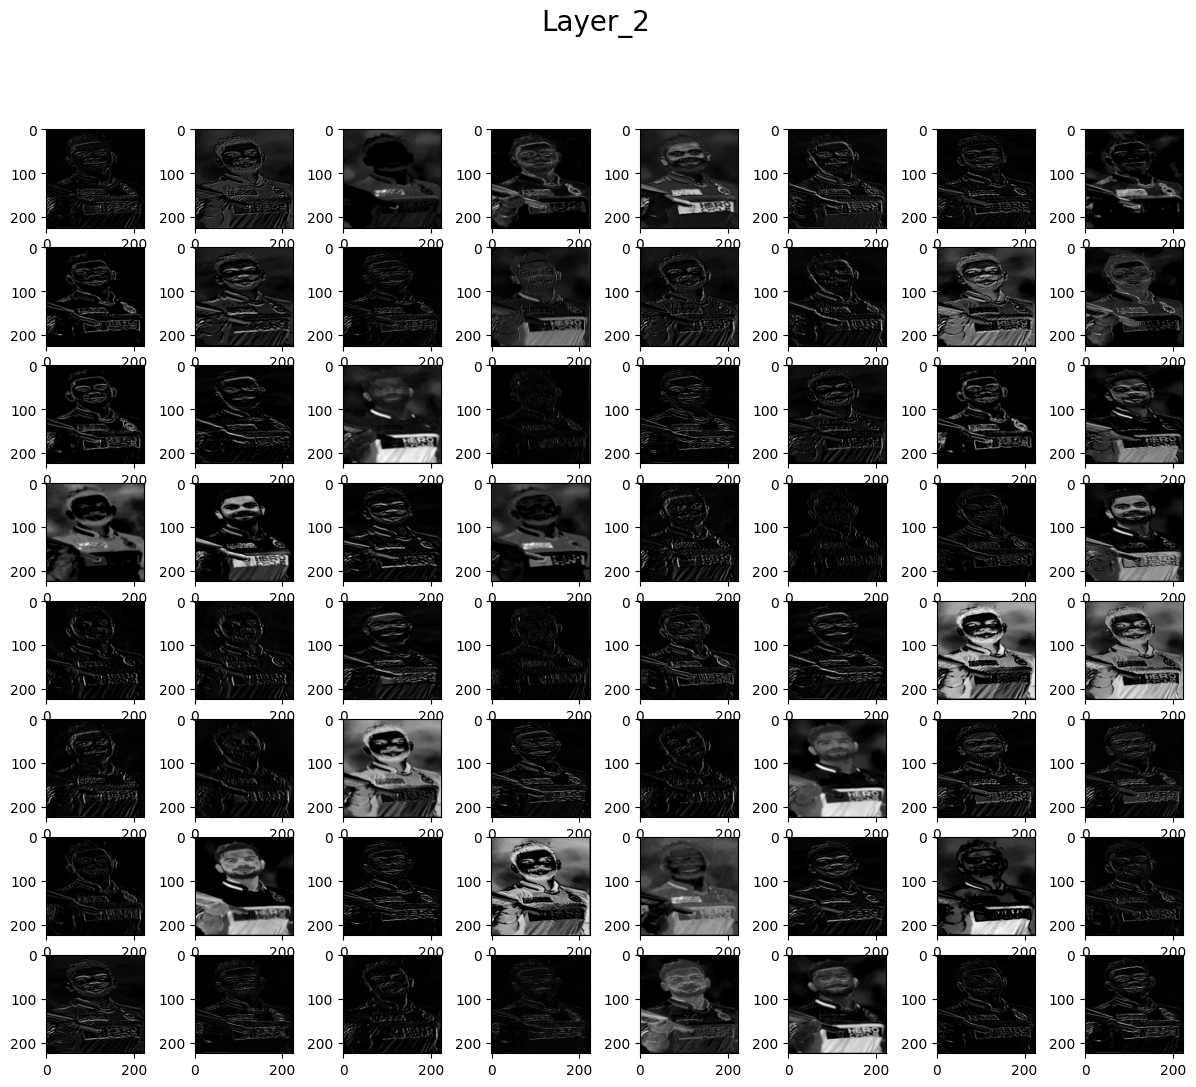

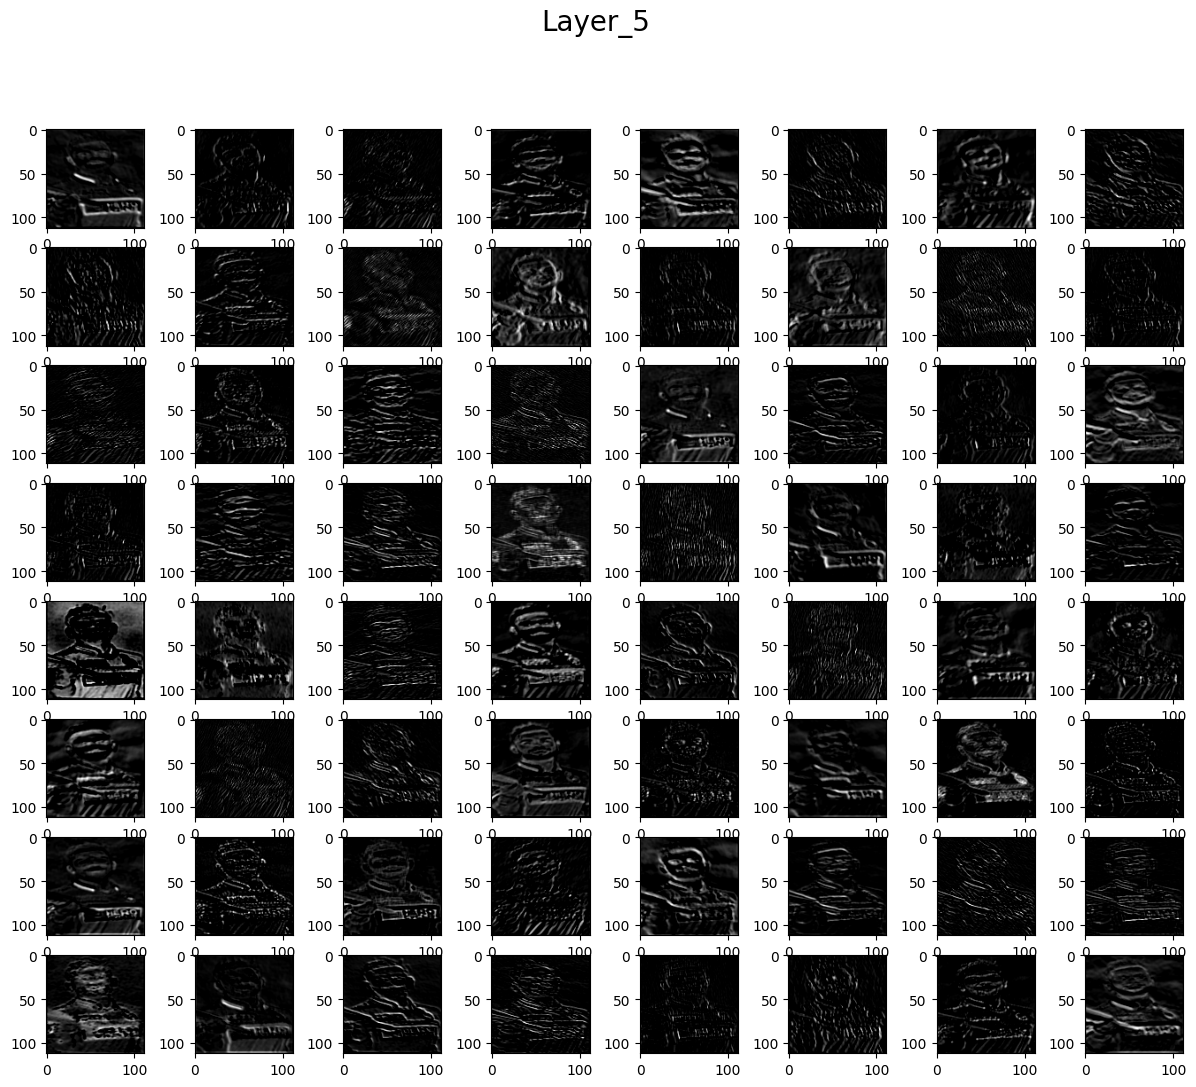

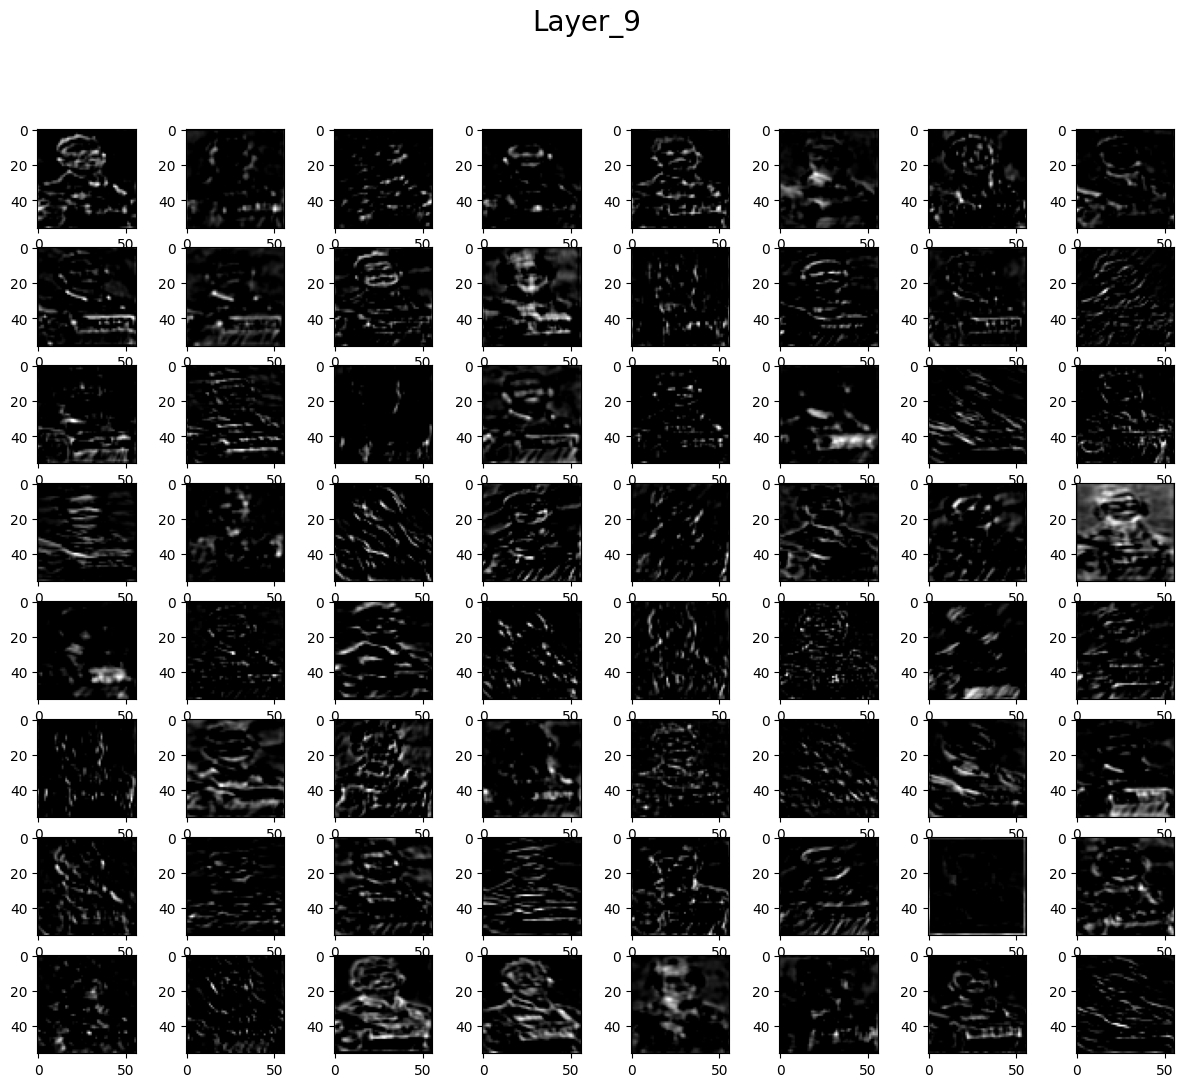

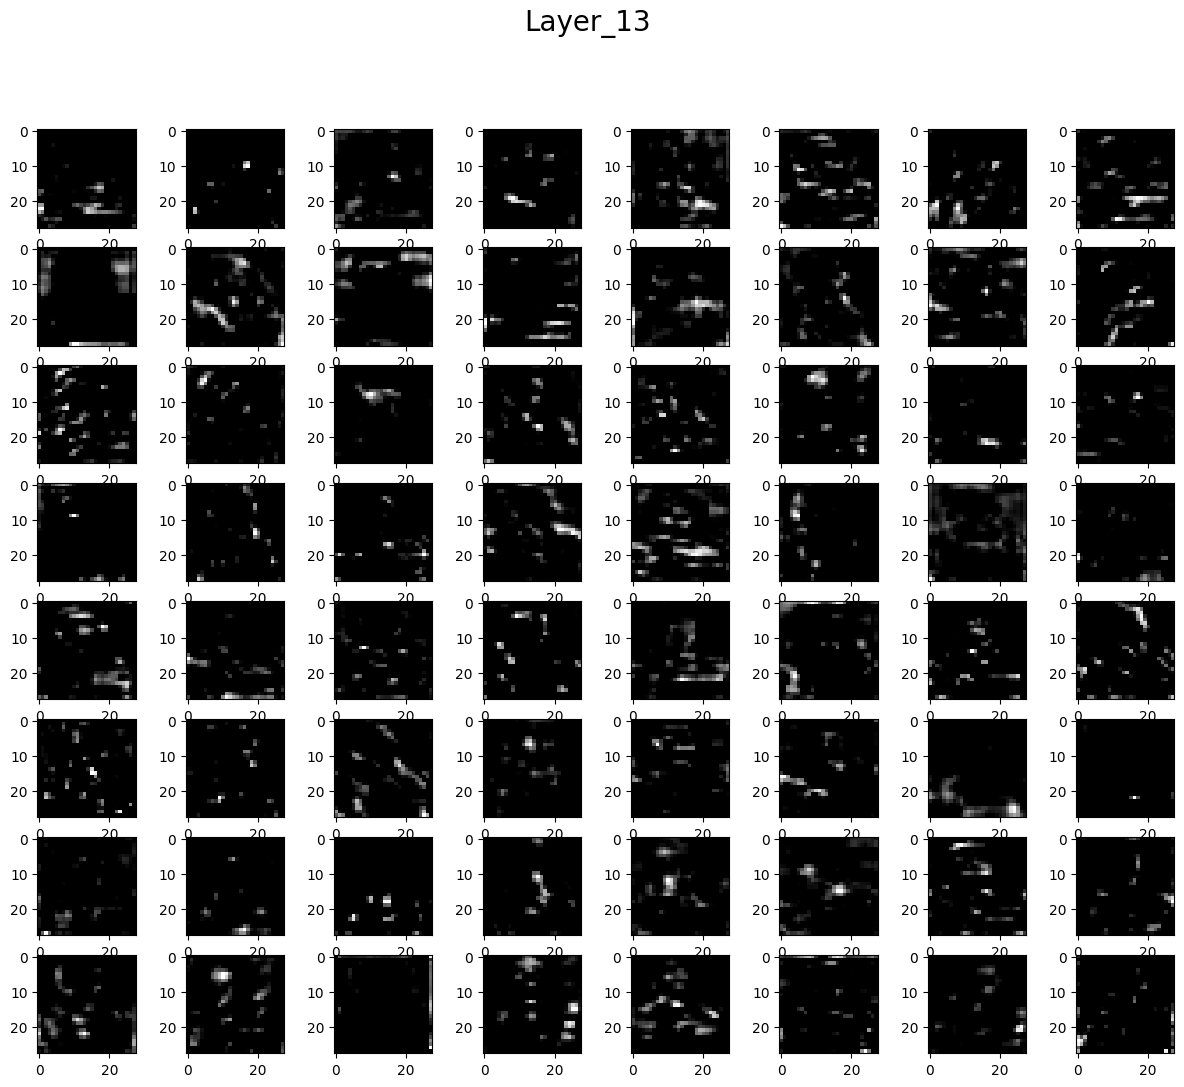

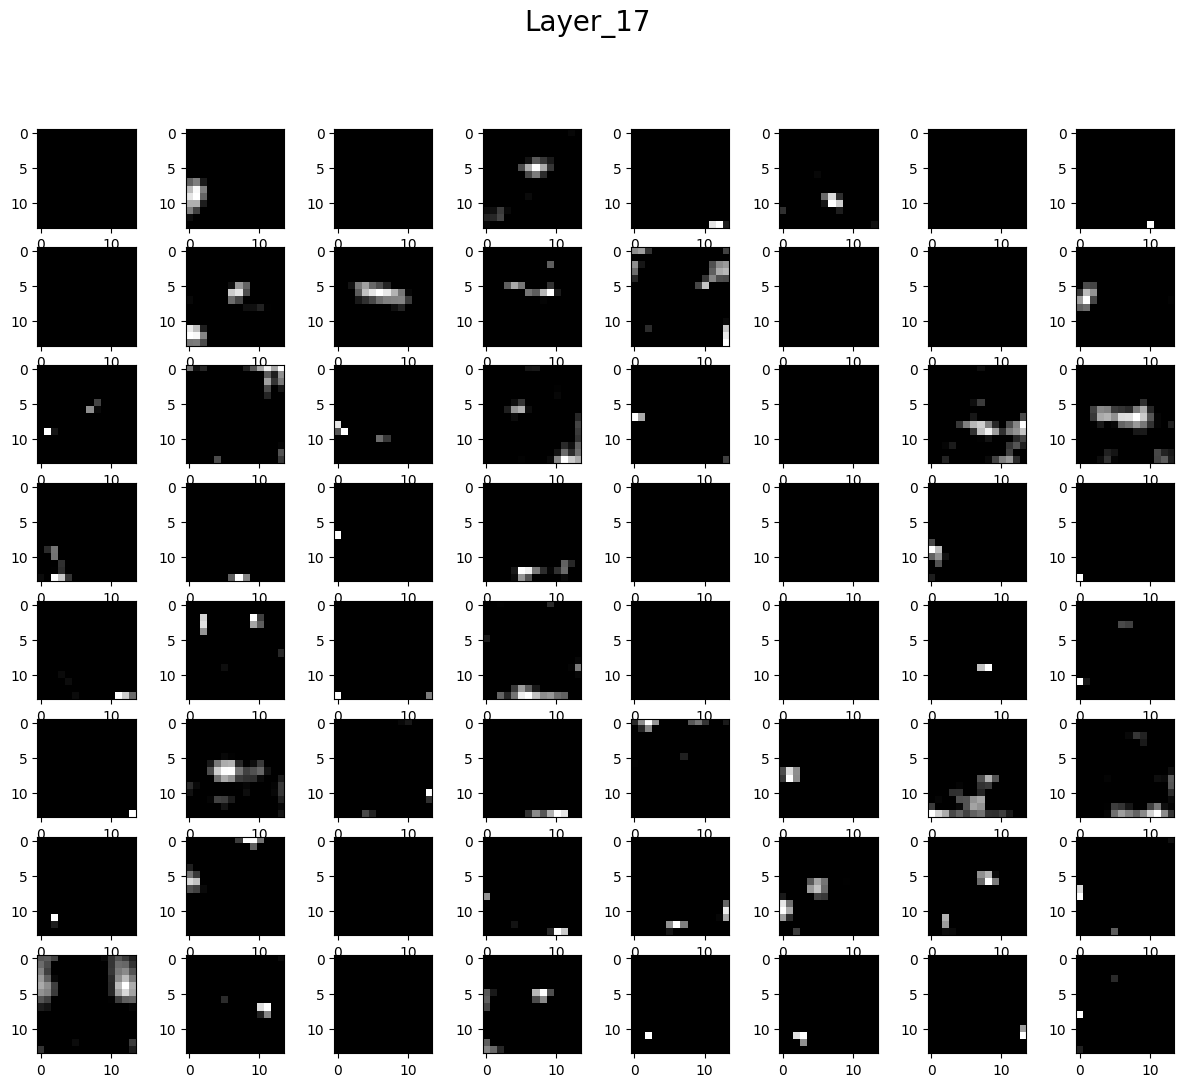

In [92]:
feature_map = model3.predict(image)

for i , fmap in zip(layer_index, feature_map):
  fig = plt.figure(figsize=(15,12))
  fig.suptitle(f'Layer_{i}', fontsize = 20)
  for i in range(1, features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(fmap[0,:,:,i-1], cmap = 'gray')

plt.show()

In [ ]:
## WHole Idea was understand the feature map of ubsequent layers and observe the output of each layer. So as per the observation
## VGG16 is trained on imagenet dataset which has Human being as a class/label.Obviosuly they donot know who Virat Kholi is
## So that is why the model is trying to predict the output as human being and by coming to the last layer the image is completely
## blurr. So this was the who Idea of this code.